###Clustering | Assignment

Ques1 : What is the difference between K-Means and Hierarchical Clustering?
Provide a use case for each.

Answer :

### K-Means Clustering vs. Hierarchical Clustering

Both K-Means and Hierarchical Clustering are popular unsupervised machine learning algorithms used for grouping data points. Here's a breakdown of their differences and use cases:

#### K-Means Clustering

*   **Approach:** K-Means is a **partitioning** clustering algorithm. It aims to partition 'n' observations into 'k' clusters, where each observation belongs to the cluster with the nearest mean (centroid). The number of clusters (k) must be specified *a priori*.

*   **Pros:** Computationally efficient for large datasets, relatively simple to understand and implement.
*   **Cons:** Requires specifying `k` beforehand, sensitive to initial centroid placement (can lead to different results), struggles with non-globular or irregularly shaped clusters, sensitive to outliers.
*   **Use Case:**
    *   **Customer Segmentation:** A retail company wants to group its customers into different segments based on their purchasing behavior (e.g., frequency of purchases, average transaction value). This helps them tailor marketing strategies to each segment. K-Means can effectively identify these distinct customer groups quickly if the number of desired segments is known.

#### Hierarchical Clustering

*   **Approach:** Hierarchical Clustering builds a hierarchy of clusters, represented as a dendrogram. It can be either **agglomerative** (bottom-up, starting with individual data points and merging them into clusters) or **divisive** (top-down, starting with one large cluster and splitting it).

*   **Pros:** Does not require specifying the number of clusters in advance (you can decide by cutting the dendrogram), produces a dendrogram which can be very informative about the relationships between clusters, can discover clusters of arbitrary shapes.
*   **Cons:** Computationally more intensive for large datasets (especially distance matrix calculation), once a merge or split is made, it cannot be undone, interpreting dendrograms can sometimes be subjective.
*   **Use Case:**
    *   **Biological Taxonomy/Gene Expression Analysis:** Biologists might use hierarchical clustering to group similar species or to identify groups of genes that exhibit similar expression patterns under different conditions. The resulting dendrogram visually represents the evolutionary relationships or functional similarities between the entities, which is crucial for understanding biological hierarchies.

Question 2: Explain the purpose of the Silhouette Score in evaluating clustering
algorithms.

Answer:

The Silhouette Score
The Silhouette Score (or Silhouette Coefficient) is a metric used to evaluate the quality of clusters created by clustering algorithms like K-Means or Hierarchical Clustering. It measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation).


Purpose:
The primary purpose of the Silhouette Score is to provide a way to:


Assess the quality of clustering: It helps determine how well data points are grouped within their clusters and how distinct the clusters are from each other.
Determine the optimal number of clusters (k): By calculating the Silhouette Score for different values of k (the number of clusters), one can identify the k that yields the highest average Silhouette Score, indicating a better-defined clustering structure.

The Silhouette Score ranges from -1 to +1:

Scores close to +1: Indicate that data points are well-matched to their own cluster and poorly matched to neighboring clusters. This suggests a good clustering solution with distinct and compact clusters.
Scores close to 0: Indicate that data points are on or very close to the decision boundary between two neighboring clusters. This suggests overlapping clusters or that the data point could belong to either cluster.
Scores close to -1: Indicate that data points are assigned to the wrong cluster. This suggests a poor clustering solution

Question 3: What are the core parameters of DBSCAN, and how do they influence the
clustering process?

Answer:

### DBSCAN Clustering: Core Parameters

DBSCAN is a density-based clustering algorithm that groups together data points that are closely packed together, marking as outliers points that lie alone in low-density regions. Unlike K-Means, it does not require specifying the number of clusters beforehand and can find arbitrarily shaped clusters.

DBSCAN has two core parameters:

1.  **`eps` (ε or Epsilon):**
    *   **Definition:** This parameter defines the maximum radius of the neighborhood around a data point. It specifies how close points must be to each other to be considered part of the same cluster.
    *   **Influence on Clustering:**
        *   **Small `eps`:** A smaller `eps` means points must be very close to each other to be considered neighbors. This can lead to more clusters (potentially smaller ones) and a higher number of noise points, as fewer points will meet the density requirement within such a small radius.
        *   **Large `eps`:** A larger `eps` means points can be further apart and still be considered neighbors. This can result in fewer, larger clusters, and fewer noise points, as more points will fall within the neighborhood of others. If `eps` is too large, multiple distinct clusters might merge into a single large cluster.

2.  **`min_samples` (or `MinPts`):**
    *   **Definition:** This parameter defines the minimum number of data points (a threshold) required to form a dense region (a cluster). It includes the point itself.
    *   **Influence on Clustering:**
        *   **Small `min_samples`:** A smaller `min_samples` makes the algorithm more sensitive to noise, as even sparse groups of points can be considered clusters. This can lead to many small, potentially spurious clusters.
        *   **Large `min_samples`:** A larger `min_samples` requires more points to be close together to form a cluster. This makes the algorithm more robust to noise and tends to identify only truly dense clusters. However, if `min_samples` is too large, some legitimate but less dense clusters might be missed and classified as noise.

### How They Work Together:

*   A data point `p` is a **core point** if at least `min_samples` points (including `p` itself) are within a distance of `eps` from `p`.
*   A data point `q` is directly **density-reachable** from `p` if `q` is within the `eps` distance from `p` and `p` is a core point.
*   A data point `r` is **density-reachable** from `p` if there is a chain of directly density-reachable points starting at `p` and ending at `r`.
*   A data point is an **outlier** (or noise point) if it is not a core point and not density-reachable from any core point.

### Tuning DBSCAN Parameters:

Choosing appropriate values for `eps` and `min_samples` is crucial for effective clustering. Common approaches include:

*   **K-distance graph:** Plotting the sorted distances to the k-th nearest neighbor for each point can help identify a suitable `eps` value (often where the curve makes a sharp 'elbow').
*   **Domain knowledge:** Understanding the density characteristics of your data can guide parameter selection.
*   **Trial and Error / Grid Search:** Experimenting with different combinations and evaluating the clustering results (e.g., using visualization or metrics like the Silhouette Score for varying parameters) can help find optimal values.

Question 4: Why is feature scaling important when applying clustering algorithms like
K-Means and DBSCAN?

Answer:


Feature scaling is a data preprocessing step that transforms features to a common scale. It's particularly important for clustering algorithms like K-Means and DBSCAN for several reasons:

1.  **Distance-Based Algorithms:**
    *   Both K-Means and DBSCAN rely heavily on distance calculations (e.g., Euclidean distance) to determine similarity between data points and form clusters. K-Means uses distances to assign points to centroids, and DBSCAN uses distances to define neighborhoods and density.
    *   If features have vastly different scales (e.g., one feature ranges from 0 to 1000, while another ranges from 0 to 1), the feature with the larger scale will disproportionately influence the distance calculations.
    *   **Example:** Imagine clustering houses based on 'number of rooms' (1-10) and 'price' (100,000-1,000,000). A small difference in price will have a much larger impact on the distance calculation than a significant difference in the number of rooms, effectively making the 'number of rooms' feature almost irrelevant.

2.  **Equal Weight to Features:**
    *   Scaling ensures that all features contribute equally to the distance computation, preventing features with larger numerical ranges from dominating the clustering process.
    *   It puts all features on a level playing field, allowing the algorithm to consider the true underlying relationships and patterns in the data rather than being skewed by arbitrary differences in measurement units.

3.  **Impact on K-Means:**
    *   **Centroid Calculation:** K-Means calculates centroids by averaging data points. If features are not scaled, the centroid's position will be heavily influenced by the feature with the largest values, pulling the clusters towards those dimensions.
    *   **Convergence:** Scaling can sometimes lead to faster convergence of the K-Means algorithm by creating a more spherical and well-behaved feature space.

4.  **Impact on DBSCAN:**
    *   **`eps` Parameter:** The `eps` (epsilon) parameter in DBSCAN defines the radius of a neighborhood. If features are not scaled, determining an appropriate `eps` value becomes extremely challenging and often leads to poor clustering results. An `eps` that works for one feature's scale might be completely inappropriate for another.
    *   **Density Definition:** The concept of 'density' in DBSCAN is based on the number of points within `eps` distance. Without scaling, density estimations can be misleading, as a dense region in one dimension might appear sparse due to a large scale difference in another.



Question 5: What is the Elbow Method in K-Means clustering and how does it help
determine the optimal number of clusters?

### The Elbow Method for K-Means Clustering

The **Elbow Method** is a heuristic approach used to help determine the optimal number of clusters (`k`) for a K-Means clustering algorithm. It's based on the idea that as you increase the number of clusters, the variance within each cluster (intra-cluster variance) will decrease.

#### How it works:

1.  **Run K-Means for a range of `k` values:** You typically run the K-Means algorithm multiple times, each time with a different number of clusters (e.g., from `k=1` to `k=10` or a suitable range).
2.  **Calculate the Sum of Squared Errors (SSE):** For each value of `k`, you calculate the **Sum of Squared Errors (SSE)**, also known as **inertia**. SSE is the sum of the squared distances between each data point and the centroid of its assigned cluster. A lower SSE generally indicates a better clustering, as it means data points are closer to their respective cluster centroids.
3.  **Plot `k` vs. SSE:** You then plot the SSE values on the y-axis against the number of clusters (`k`) on the x-axis.

#### Interpreting the 'Elbow':

*   **The 'Elbow' Point:** As `k` increases, the SSE will naturally decrease because data points will be closer to their assigned centroids (more clusters mean smaller, tighter clusters). However, the rate of decrease in SSE usually changes significantly at a certain point. This point, where the decrease in SSE begins to slow down dramatically, forming an 'elbow' shape in the plot, is considered the optimal number of clusters.
*   **Rationale:** Beyond the 'elbow' point, adding more clusters doesn't provide much better modeling of the data (i.e., the gains in reducing SSE are marginal), and you start to overfit the data by creating too many small clusters.

#### Why it helps:

*   **Visual Guidance:** It provides a simple and intuitive visual guide to choose `k` without complex statistical calculations.
*   **Balances Cohesion and Complexity:** It helps strike a balance between having too few clusters (high SSE, poor representation) and too many clusters (low SSE, but potentially overfitting and less interpretable).

#### Limitations:

*   **Subjectivity:** The 'elbow' can sometimes be ambiguous or not clearly defined, making the choice of `k` subjective.
*   **Not Always Present:** Some datasets might not exhibit a clear elbow.
*   **Doesn't Consider Separation:** The Elbow Method primarily focuses on intra-cluster cohesion (minimizing SSE) but doesn't explicitly consider how well separated the clusters are from each other.

Dataset:
Use make_blobs, make_moons, and sklearn.datasets.load_wine() as
specified.

Question 6: Generate synthetic data using make_blobs(n_samples=300, centers=4),
apply KMeans clustering, and visualize the results with cluster centers.

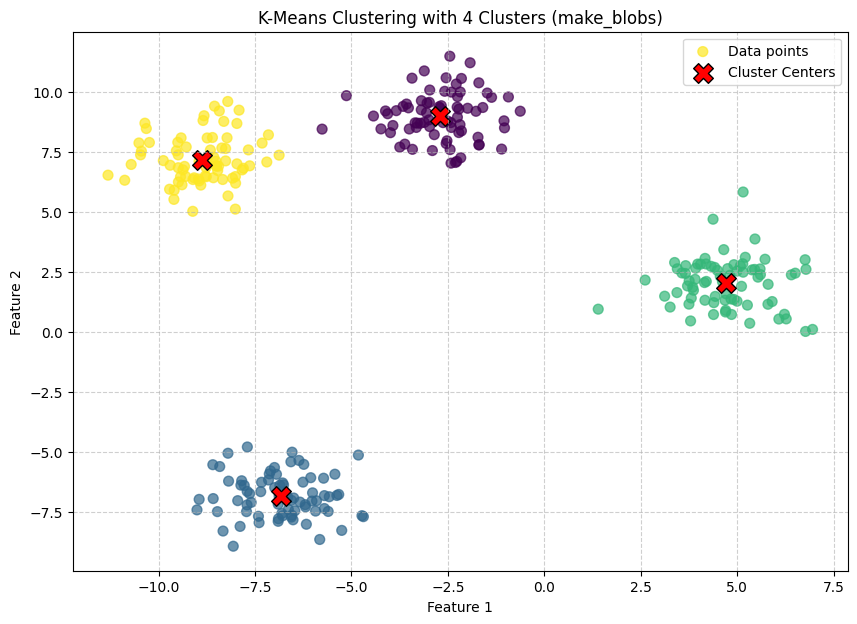

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import numpy as np

# 1. Generate synthetic data using make_blobs
n_samples = 300
n_centers = 4
X, y = make_blobs(n_samples=n_samples, centers=n_centers, random_state=42, cluster_std=1.0)

# 2. Apply KMeans clustering
kmeans = KMeans(n_clusters=n_centers, random_state=42, n_init=10) # n_init is explicitly set to suppress warning
kmeans.fit(X)

# Get cluster labels and cluster centers
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# 3. Visualize the results
plt.figure(figsize=(10, 7))

# Plot data points, colored by cluster
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis', alpha=0.7, label='Data points')

# Plot cluster centers
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X', edgecolor='black', label='Cluster Centers')

plt.title(f'K-Means Clustering with {n_centers} Clusters (make_blobs)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Load the Wine dataset, apply StandardScaler , and then train a DBSCAN
model. Print the number of clusters found (excluding noise).


In [2]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

# 1. Load the Wine dataset
wine = load_wine()
X_wine = wine.data
y_wine = wine.target # Target labels (for reference, not used by DBSCAN)

# 2. Apply StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_wine)

# 3. Train a DBSCAN model
# It's important to choose eps and min_samples appropriately for the dataset.
# For demonstration, we'll pick some common values. In a real scenario, these would be tuned.
# A common strategy is to look at a k-distance graph for eps.
eps = 0.8 # Example value, needs tuning for optimal performance
min_samples = 5 # Example value, needs tuning
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
clusters = dbscan.fit_predict(X_scaled)

# 4. Print the number of clusters found (excluding noise)
# Noise points are labeled as -1 by DBSCAN
n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
print(f"Number of clusters found by DBSCAN (excluding noise): {n_clusters}")

# Optional: Print the labels and the count of noise points
unique_labels, counts = np.unique(clusters, return_counts=True)
print(f"All labels and their counts: {dict(zip(unique_labels, counts))}")

Number of clusters found by DBSCAN (excluding noise): 0
All labels and their counts: {np.int64(-1): np.int64(178)}


Ques 8:
Generate moon-shaped synthetic data using
make_moons(n_samples=200, noise=0.1), apply DBSCAN, and highlight the outliers in
the plot.


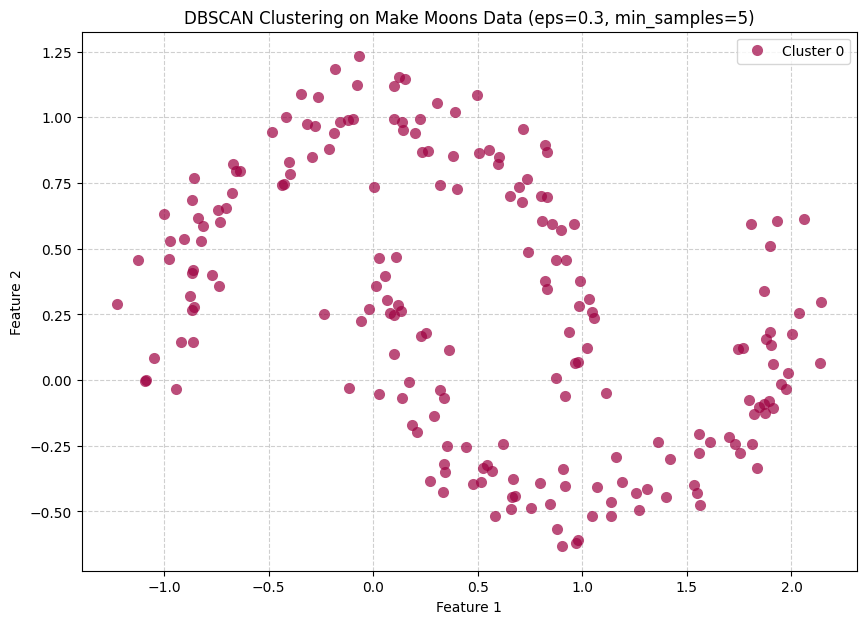

In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
import numpy as np

# 1. Generate moon-shaped synthetic data
n_samples = 200
noise = 0.1
X_moons, y_moons = make_moons(n_samples=n_samples, noise=noise, random_state=42)

# 2. Apply DBSCAN
# For moon-shaped data, DBSCAN parameters need careful tuning.
# Let's start with some values that often work well for this dataset.
eps_moons = 0.3 # Max distance between two samples for one to be considered as in the neighborhood of the other
min_samples_moons = 5 # The number of samples (or total weight) in a neighborhood for a point to be considered as a core point
dbscan_moons = DBSCAN(eps=eps_moons, min_samples=min_samples_moons)
clusters_moons = dbscan_moons.fit_predict(X_moons)

# 3. Visualize the results and highlight outliers
plt.figure(figsize=(10, 7))

# Get unique cluster labels (including noise labeled as -1)
unique_labels = set(clusters_moons)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

for k, col in zip(unique_labels, colors):
    if k == -1:  # Noise points
        # Black used for noise.
        col = [0, 0, 0, 1]
        marker_style = 'x'
        edgecolor = 'black'
        label = 'Outliers'
    else:
        marker_style = 'o'
        edgecolor = 'none'
        label = f'Cluster {k}'

    # Select points belonging to the current cluster/noise
    class_member_mask = (clusters_moons == k)
    xy = X_moons[class_member_mask]

    plt.plot(xy[:, 0], xy[:, 1], marker_style, markerfacecolor=tuple(col),
             markeredgecolor=edgecolor, markersize=8, alpha=0.7, label=label)

plt.title(f'DBSCAN Clustering on Make Moons Data (eps={eps_moons}, min_samples={min_samples_moons})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Question 9: Load the Wine dataset, reduce it to 2D using PCA, then apply
Agglomerative Clustering and visualize the result in 2D with a scatter plot.


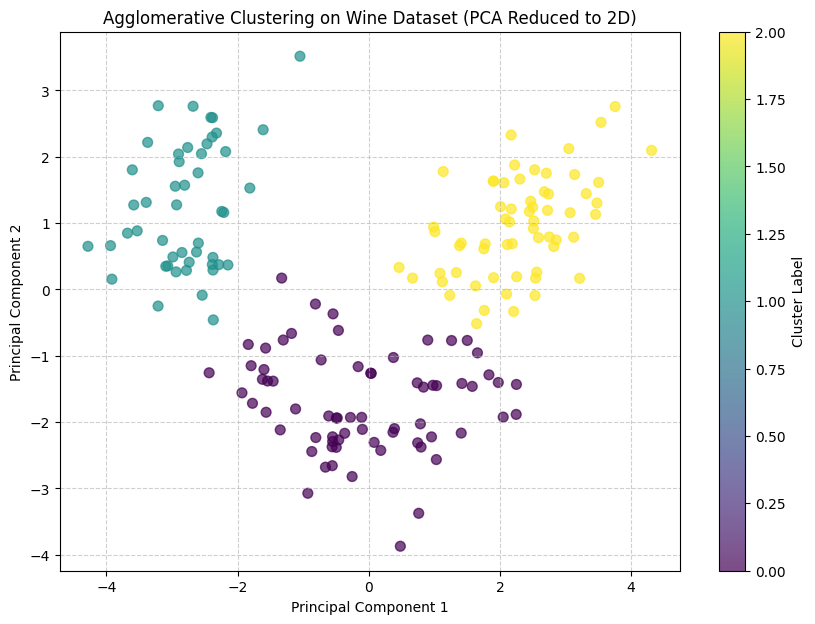

In [4]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import numpy as np

# 1. Load the Wine dataset
wine = load_wine()
X_wine = wine.data
y_wine = wine.target # Original target labels for reference if needed

# 2. Apply StandardScaler (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_wine)

# 3. Reduce to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 4. Apply Agglomerative Clustering
# The Wine dataset originally has 3 classes, so let's try n_clusters=3.
agg_clustering = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
clusters_agg = agg_clustering.fit_predict(X_pca)

# 5. Visualize the result in 2D with a scatter plot
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters_agg, cmap='viridis', s=50, alpha=0.7)
plt.title('Agglomerative Clustering on Wine Dataset (PCA Reduced to 2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Question 10: You are working as a data analyst at an e-commerce company. The
marketing team wants to segment customers based on their purchasing behavior to run
targeted promotions. The dataset contains customer demographics and their product
purchase history across categories.


Describe your real-world data science workflow using clustering:

● Which clustering algorithm(s) would you use and why?
● How would you preprocess the data (missing values, scaling)?
● How would you determine the number of clusters?
● How would the marketing team benefit from your clustering analysis?

### Real-World Data Science Workflow: Customer Segmentation using Clustering

**Scenario:** As a data analyst at an e-commerce company, the marketing team wants to segment customers based on their purchasing behavior and demographics to run targeted promotions.

#### 1. Which Clustering Algorithm(s) would you use and why?

For customer segmentation, I would primarily consider **K-Means Clustering** and potentially **Hierarchical Clustering** or **DBSCAN** for validation or specific scenarios.

*   **K-Means Clustering:**
    *   **Why:** It's computationally efficient, scales well to large datasets (which is common in e-commerce), and is relatively easy to interpret. Given that the marketing team likely has a general idea of the 'types' of customer segments they want (e.g., 'high-value,' 'bargain-hunters'), K-Means' requirement of specifying `k` (number of clusters) upfront can align well with business objectives. It's excellent for identifying distinct, spherical-shaped groups, which often represent customer segments.
    *   **Consideration:** It struggles with non-globular clusters and is sensitive to outliers and the initial placement of centroids. However, with appropriate preprocessing and careful `k` selection, these can be mitigated.

*   **Hierarchical Clustering (Agglomerative):**
    *   **Why:** While more computationally intensive, it can provide a powerful visual representation (dendrogram) of how customers group together, which can be invaluable for understanding relationships between segments. It doesn't require specifying `k` upfront, allowing for exploration of different levels of granularity in customer segments.
    *   **Use Case:** I might use this as an exploratory tool initially or to validate the number of clusters suggested by K-Means, or to identify sub-segments within a larger K-Means cluster.

*   **DBSCAN:**
    *   **Why:** Excellent for finding arbitrarily shaped clusters and identifying outliers (which might be 'one-off' customers or fraudulent accounts). It doesn't require specifying `k`.
    *   **Use Case:** Less ideal for directly defining *all* customer segments if the segments are expected to be somewhat uniform in density, but very useful for identifying unique, dense pockets of customers or, more importantly, for flagging potential outliers that don't fit into any main segment.

**Primary Choice:** I would start with **K-Means** due to its scalability and interpretability for initial segmentation, using Hierarchical Clustering or DBSCAN for deeper insights or outlier detection if needed.

#### 2. How would you preprocess the data (missing values, scaling)?

Data preprocessing is critical for the success of clustering:

*   **Feature Engineering:** Before anything else, I'd create relevant features from the raw data:
    *   **RFM (Recency, Frequency, Monetary) values:** Recency (days since last purchase), Frequency (total number of purchases), Monetary (total spending).
    *   **Product Category Preferences:** e.g., ratio of spending in 'Electronics' vs. 'Apparel'.
    *   **Average Order Value, Discount Sensitivity, Return Rate.**
    *   **Demographic features:** Age, gender, location (if available and relevant).

*   **Handling Missing Values:**
    *   **Identify:** First, identify the extent and patterns of missing data.
    *   **Imputation (Numerical):** For numerical features (like average order value), I'd use imputation techniques such as:
        *   **Mean/Median imputation:** For features with minimal skew.
        *   **K-Nearest Neighbors (KNN) imputation:** To impute values based on similar customers.
        *   **Regression imputation:** Predicting missing values based on other features.
    *   **Imputation (Categorical):** For categorical features (like gender or preferred category), I might use mode imputation or create a 'Missing' category.
    *   **Removal:** If a feature has a very high percentage of missing values and cannot be reliably imputed, or if a specific customer record has too many missing values, I might consider removing that feature or record.

*   **Scaling:**
    *   **Necessity:** Absolutely essential for distance-based algorithms like K-Means, Hierarchical Clustering, and DBSCAN. Features with larger ranges (e.g., total monetary value) would disproportionately influence the distance calculations compared to features with smaller ranges (e.g., number of purchases or age).
    *   **Method:** I would use **StandardScaler** (`(x - mean) / std`) to transform features to have zero mean and unit variance. This is generally preferred over Min-Max scaling for clustering as it handles outliers better and results in a more spherical data distribution, which is advantageous for K-Means.

#### 3. How would you determine the number of clusters?

Determining the optimal `k` (number of clusters) is often more of an art than a science, and I would use a combination of methods:

*   **Elbow Method (for K-Means):**
    *   **Process:** Run K-Means for a range of `k` values (e.g., 2 to 15). For each `k`, calculate the Within-Cluster Sum of Squares (WSS) or inertia. Plot WSS against `k`.
    *   **Interpretation:** Look for the 'elbow' point where the rate of decrease in WSS significantly slows down. This point suggests a good balance between reducing within-cluster variance and not adding too many redundant clusters.

*   **Silhouette Score:**
    *   **Process:** Calculate the Silhouette Score for each `k` in the chosen range. The Silhouette Score measures how similar an object is to its own cluster compared to other clusters.
    *   **Interpretation:** The `k` value that yields the highest average Silhouette Score is often considered optimal, indicating well-separated and cohesive clusters.

*   **Domain Knowledge and Business Objectives:**
    *   **Importance:** This is paramount. The marketing team might already have an idea of how many segments they *can* effectively target or want to target. For instance, they might need 3-5 distinct segments for their campaigns.
    *   **Collaboration:** I would present the results from the Elbow Method and Silhouette Score to the marketing team and discuss what makes sense from a business perspective. A statistically optimal `k` might not always be the most actionable one.

*   **Visual Inspection (PCA/t-SNE):**
    *   **Process:** If the data can be reduced to 2 or 3 dimensions using techniques like PCA or t-SNE, visualizing the clusters can help assess their distinctiveness and coherence for different `k` values.

#### 4. How would the marketing team benefit from your clustering analysis?

The clustering analysis provides actionable insights that can significantly benefit the marketing team:

*   **Targeted Marketing Campaigns:**
    *   **Personalization:** Instead of one-size-fits-all campaigns, the marketing team can tailor messages, offers, and product recommendations to the specific needs and preferences of each customer segment.
    *   **Increased ROI:** By focusing resources on segments most likely to respond positively, marketing spend can be optimized, leading to higher conversion rates and better return on investment.

*   **Product Development and Inventory Management:**
    *   **Identify Gaps:** Understanding what different segments buy (or don't buy) can inform product development, revealing unmet needs or popular product categories.
    *   **Stock Optimization:** Predicting demand for certain products by segment can help optimize inventory levels, reducing waste and ensuring popular items are always in stock.

*   **Customer Lifetime Value (CLV) Prediction:**
    *   **High-Value Segments:** Identify and nurture high-CLV segments with exclusive offers or loyalty programs.
    *   **Churn Prevention:** Identify at-risk segments (e.g., those with decreasing frequency or monetary value) and implement re-engagement strategies.

*   **Pricing Strategies:**
    *   **Segment-Specific Pricing:** Implement pricing strategies that resonate with each segment's price sensitivity (e.g., offering discounts to 'bargain-hunters' or premium services to 'high-spenders').

*   **Website/App Personalization:**
    *   **Tailored Experience:** Dynamically adjust website content, product displays, and navigation based on the segment a returning customer belongs to.

*   **Improved Communication:**
    *   **Channel Preference:** Understand which communication channels (email, social media, in-app notifications) are most effective for each segment.

In essence, clustering transforms a large, undifferentiated customer base into manageable, interpretable groups, allowing the marketing team to act strategically and drive more personalized and effective customer interactions.